In [78]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
tf.__version__

'2.9.1'

In [79]:
df = pd.read_csv(r"SalesData.csv")

In [80]:
df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [82]:
df.head(10)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


In [83]:
df.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352519
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [84]:
df.sample(5)

,Temperature,Revenue
374,23.984641,559.135869
292,27.529232,661.467519
187,11.187757,293.926393
414,27.117739,658.593732
99,9.954357,283.834327


In [85]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [86]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,500.0,22.232225,8.096388,0.0,17.122258,22.392791,27.740674,45.0
Revenue,500.0,521.570777,175.404751,10.0,405.558681,529.368565,642.257922,1000.0


/home/valkiryan/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


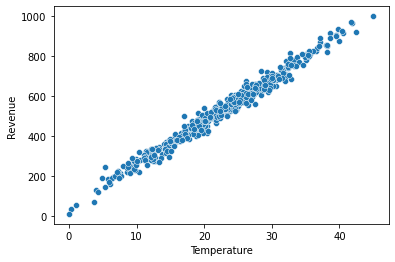

In [87]:
sns.scatterplot(df["Temperature"], df["Revenue"]);

In [88]:
x_train = df["Temperature"]
y_train = df["Revenue"]

In [89]:
x_train.shape

(500,)

In [90]:
y_train.shape

(500,)

In [91]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 10, input_shape = [1]))
model.add(tf.keras.layers.Dense(units = 1))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.1), loss = "mean_squared_error")

In [93]:
epochs_hist = model.fit(x_train, y_train, epochs = 1000)

Epoch 1/1000
16/16 [==============================] - 0s 1ms/step - loss: 201081.4219
Epoch 2/1000
16/16 [==============================] - 0s 1ms/step - loss: 14874.0107
Epoch 3/1000
16/16 [==============================] - 0s 1ms/step - loss: 4091.7461
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 1397.5438
Epoch 5/1000
16/16 [==============================] - 0s 2ms/step - loss: 856.5874
Epoch 6/1000
16/16 [==============================] - 0s 2ms/step - loss: 726.4916
Epoch 7/1000
16/16 [==============================] - 0s 2ms/step - loss: 686.4833
Epoch 8/1000
16/16 [==============================] - 0s 2ms/step - loss: 677.7259
Epoch 9/1000
16/16 [==============================] - 0s 2ms/step - loss: 679.5811
Epoch 10/1000
16/16 [==============================] - 0s 2ms/step - loss: 692.1802
Epoch 11/1000
16/16 [==============================] - 0s 2ms/step - loss: 665.8705
Epoch 12/1000
16/16 [==============================] - 0s 2ms/step - loss: 669

In [94]:
epochs_hist.history.keys()

dict_keys(['loss'])

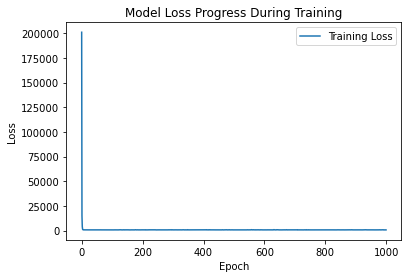

In [95]:
plt.title("Model Loss Progress During Training")
plt.plot(epochs_hist.history["loss"])

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training Loss"]);

In [96]:
model.get_weights()

[array([[ 7.0363295e-01, -1.7950438e-02,  8.6910054e-02,  9.7644739e-03,
          1.7053931e-03,  4.5011139e+00, -3.1934041e-03, -1.9866861e-03,
          2.0986702e-02,  6.1805435e-03]], dtype=float32),
 array([ 3.3431332 ,  0.4912124 , -2.290137  , -0.26486003, -0.04392459,
         6.767587  ,  0.08278336,  0.0535793 , -0.5672871 , -0.17069946],
       dtype=float32),
 array([[ 8.0883610e-01],
        [ 2.2608982e-03],
        [-1.3857554e-03],
        [-1.3892909e-03],
        [-8.3150429e-05],
        [ 4.6695633e+00],
        [ 5.5238529e-04],
        [ 3.3703531e-05],
        [-2.9968859e-03],
        [-3.0374684e-04]], dtype=float32),
 array([10.892568], dtype=float32)]

In [97]:
temp = 5
pred = model.predict([temp])
pred

1/1 [==============================] - 0s 90ms/step


array([[153.14034]], dtype=float32)

16/16 [==============================] - 0s 1ms/step


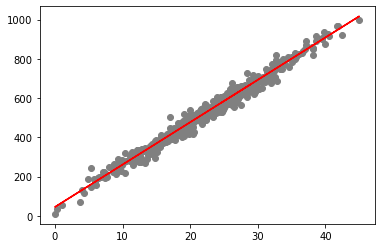

In [102]:
plt.scatter(x_train, y_train, color = "gray")
plt.plot(x_train, model.predict(x_train), color = "red");

In [119]:
#WITH SKLEARN

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [104]:
x_train.shape

(500,)

In [105]:
x_train = x_train.values.reshape(-1, 1)

In [106]:
x_train.shape

(500, 1)

In [107]:
y_train.shape

(500,)

In [108]:
y_train = y_train.values.reshape(-1, 1)

In [109]:
y_train.shape

(500, 1)

In [112]:
regressor = LinearRegression().fit(x_train, y_train)

In [115]:
regressor.coef_

array([[21.44362551]])

In [116]:
regressor.intercept_

array([44.83126709])

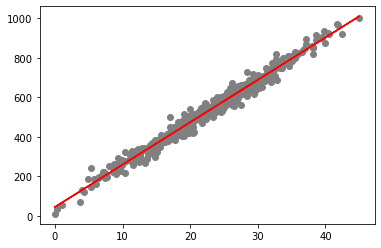

In [117]:
plt.scatter(x_train, y_train, color = "gray")
plt.plot(x_train, regressor.predict(x_train), color = "red");

In [118]:
temp = 5
pred2 = regressor.predict([[temp]])
pred2

array([[152.04939464]])